<small><i>(c) October 2016 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol).</i></small>

# Gaussian discrimination and Gaussian processes

Outline:
+ Multivariate Gaussian distribution
+ Gaussian discrimination
+ Principal Component Analysis
+ Linear discriminant analysis


## 1. Multivariate Gaussian distributions and Principal Component Analysis

This notebook deals with continuous variables modelled as multivariate Gaussian distributions.

Let us recall the multivariate normal equation in D dimensions:


$$\mathcal{N}({\bf x}|{\bf \mu},\Sigma) = \frac{1}{(2 \pi)^{D/2}|\Sigma|^{1/2}}\exp[-\frac{1}{2}({\bf x}-{\bf \mu})^T\Sigma^{-1}({\bf x}-\mu)]$$


For the sake of completeness, let us check what this looks like in a 1D example.

In [1]:
import numpy as np

def gaussian_1d(x,mu,sigma):
    factor = 1./np.sqrt(2*np.pi*sigma*sigma)
    exponent = - (x-mu)*(x-mu)/(sigma*sigma)
    return factor*np.exp(exponent)

In [2]:
xmin=-6
xmax=6
x = np.linspace(xmin,xmax,200)

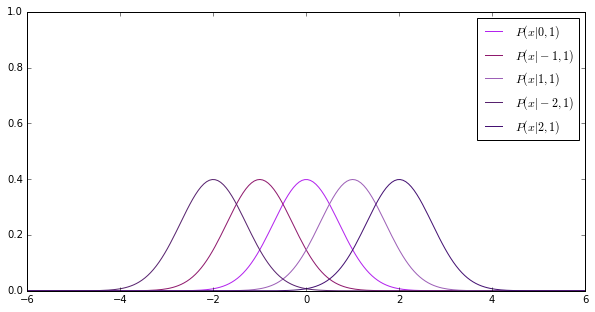

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,gaussian_1d(x,0,1),color = [np.random.rand(),np.random.rand(),np.random.rand()],label = '$P(x|0,1)$')
plt.hold('on')
plt.plot(x,gaussian_1d(x,-1,1),color = [np.random.rand(),np.random.rand(),np.random.rand()],label = '$P(x|-1,1)$')
plt.plot(x,gaussian_1d(x,1,1),color = [np.random.rand(),np.random.rand(),np.random.rand()],label = '$P(x|1,1)$')
plt.plot(x,gaussian_1d(x,-2,1),color = [np.random.rand(),np.random.rand(),np.random.rand()],label = '$P(x|-2,1)$')
plt.plot(x,gaussian_1d(x,2,1),color = [np.random.rand(),np.random.rand(),np.random.rand()],label = '$P(x|2,1)$')
plt.legend()
plt.axis([xmin,xmax,0,1])
plt.gcf().set_size_inches((10,5))

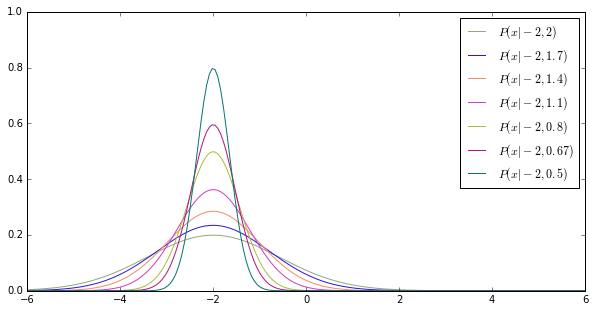

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x,gaussian_1d(x,-2,2),color = [np.random.rand(),np.random.rand(),np.random.rand()],label = '$P(x|-2,2)$')
plt.hold('on')
plt.plot(x,gaussian_1d(x,-2,1.7),color = [np.random.rand(),np.random.rand(),np.random.rand()],label = '$P(x|-2,1.7)$')
plt.plot(x,gaussian_1d(x,-2,1.4),color = [np.random.rand(),np.random.rand(),np.random.rand()],label = '$P(x|-2,1.4)$')
plt.plot(x,gaussian_1d(x,-2,1.1),color = [np.random.rand(),np.random.rand(),np.random.rand()],label = '$P(x|-2,1.1)$')
plt.plot(x,gaussian_1d(x,-2,0.8),color = [np.random.rand(),np.random.rand(),np.random.rand()],label = '$P(x|-2,0.8)$')
plt.plot(x,gaussian_1d(x,-2,0.67),color = [np.random.rand(),np.random.rand(),np.random.rand()],label = '$P(x|-2,0.67)$')
plt.plot(x,gaussian_1d(x,-2,0.5),color = [np.random.rand(),np.random.rand(),np.random.rand()],label = '$P(x|-2,0.5)$')

plt.legend()
plt.axis([xmin,xmax,0,1])
plt.gcf().set_size_inches((10,5))

### Understanding a multivariate Gaussian distribution

The expression inside the exponent is the Mahalanobis (https://es.wikipedia.org/wiki/Distancia_de_Mahalanobis) distance between the data vector $x$ and the mean vector $\mu$. Let us perform the eigendecomposition of $\Sigma$. We can write $\Sigma = U\Delta U^T$, with $U^TU = I$ (orthonormal matrix formed by the eigenvectors) and $\Delta$ is a diagonal matrix with the corresponding eigenvalues.

Because $U$ is orthogonal $U^{-1} = U^T$, then

$$\Sigma^{-1} = (U\Delta U^T)^{-1} = U^{-T}\Delta^{-1}U^{-1} = U\Delta^{-1}U^T$$

Because $\Sigma$ is positive definite all eigenvalues are positive, so are $\Sigma^{-1}$ eigenvalues. Thus

$$({\bf x}-{\bf \mu})^T\Sigma^{-1}({\bf x}-\mu)$$

is a quadratic form $x^T A x$. 

#### Quadratic forms

According to the eigenvalues of $A$ we can characterize the geometric properties of this equation. If all eigenvalues of $A$ are non-zero, then we have an *ellipsoid* or *hyperboloid*. If all eigenvalues are positive, it is an *ellipsoid* (if all are negative, we have an imaginary ellipsoid). If the signs are mixed, then we have a *hyperboloid*. If we have zero-value eigenvalues we are in front of a *paraboloid*. According to the rest of eigenvalues we may have a hyperbolic paraboloid or a elliptic paraboloid. 

In this case we are in front of an ellipsoid. Let us check this

In [5]:
#GAUSSIAN
import numpy as np
import copy
from sklearn.base import BaseEstimator

class Gaussian(BaseEstimator):
    def __init__(self,mean=None,cov=None):
        self.mean = mean 
        self.cov =  cov
        if cov!=None:
            self.icov = np.linalg.pinv(self.cov)
    
    def fit_(self,X,y=None):
        self.mean = np.mean(X,axis=0)
        self.cov = np.cov(X,rowvar=False,bias = True)
        self.icov = np.linalg.pinv(self.cov)
    
    def fit(self,X,y):
        '''This is needed for compatibility with grid search CV and pipeline.
        When using this for modeling with data of just one class use fit_() method. 
        In that case target parameter is not needed.
        '''
        Xt=X[y==self.target,:]
        self.fit_(Xt)
    
    def predict(self,X):
        err = X-self.mean
        return np.where(-0.5*np.sum(np.dot(err,self.icov)*err,axis=1)>self.thr,1.,-1.)
    
    def predict_proba(self,X):
        err = X-self.mean
        return  np.exp(-0.5*np.sum(np.dot(err,self.icov)*err,axis=1))/np.sqrt(np.power((2*np.pi),self.mean.shape[0])*np.linalg.det(self.cov))
    
print 'DONE'

DONE


(10000, 2)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


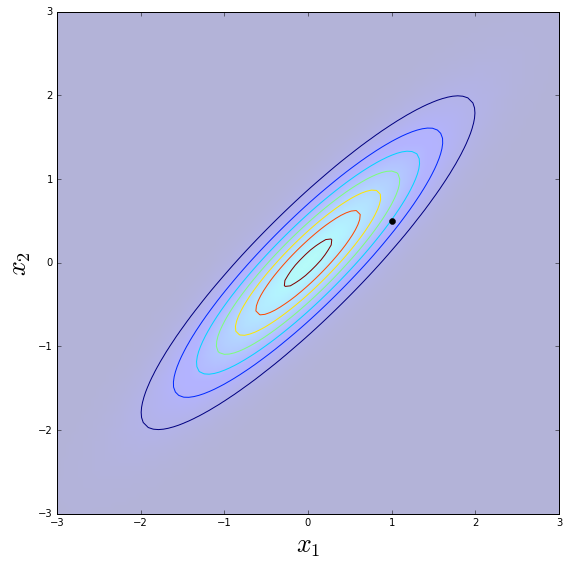

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
a = 0.9
K=np.array([[1,a],[a,1]])
g = Gaussian(cov=K, mean=np.array([0,0]))

xx = np.linspace(-3.,3.,100)
yy = np.linspace(-3.,3.,100)
[XX,YY] = np.meshgrid(xx,yy)
print np.c_[XX.ravel(),YY.ravel()].shape
Z = g.predict_proba(np.c_[XX.ravel(),YY.ravel()])

Z = Z.reshape(XX.shape)
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(XX.min(), XX.max(), YY.min(), YY.max()),alpha=0.3, vmin=0, vmax=1)
plt.contour(XX,YY,Z)
plt.plot(1,0.5,'ko',markersize=6)
fig = plt.gcf()
fig.set_size_inches(9,9)
ax = plt.gca()
ax.set_xlabel('$x_1$', size = 26)
ax.set_ylabel('$x_2$', size = 26)

Let us check the corresponding eigenvectors.

In [7]:
vaps,veps=np.linalg.eig(K)

In [8]:
veps,vaps

(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]), array([ 1.9,  0.1]))

Two engenvalues (1.9, 0.1) are both positives, so it's either ellipsoid or hyperboloid.

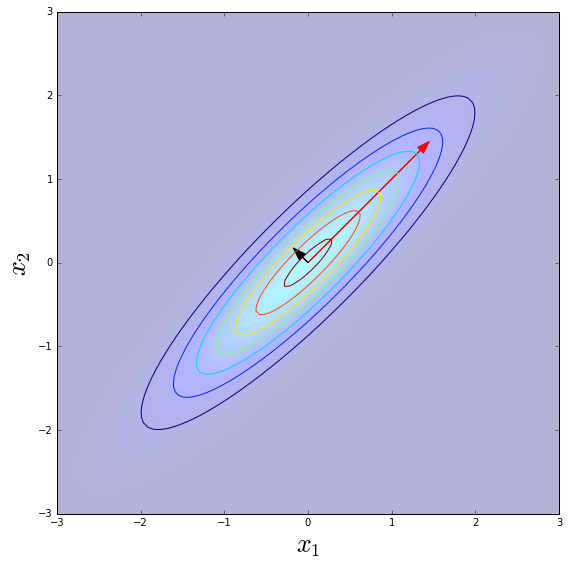

In [9]:
Z = Z.reshape(XX.shape)
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(XX.min(), XX.max(), YY.min(), YY.max()),alpha=0.3, vmin=0, vmax=1)
plt.contour(XX,YY,Z)
plt.arrow(0,0,vaps[0]*veps[0,0],vaps[0]*veps[1,0],0.5,linewidth=1,head_width=0.1,color='red')
plt.arrow(0,0,vaps[1]*veps[0,1],vaps[1]*veps[1,1],0.5,linewidth=1,head_width=0.1,color='black')
fig = plt.gcf()
fig.set_size_inches(9,9)
ax = plt.gca()
ax.set_xlabel('$x_1$', size = 26)
ax.set_ylabel('$x_2$', size = 26)

# Modelling data with a Gaussian distribution

We can think of modelling data using a Gaussian distribution. For this we can think of the parameters that maximize the Gaussian distributino, i.e. a maximum likelihood estimation.

$$\underset{\mu, \Sigma}{\text{maximize}}\quad p (D|\mu,\Sigma)$$

It can be proven that the ML estimator for those parameters is given by 

$$\mu^* = \frac{1}{N}\sum_i x_i$$
$$\Sigma^* = \frac{1}{N}\sum_i (x_i-\mu)^T(x_i-\mu)$$




Note that the covariance matrix estimation is a biased estimator when found using MLE.

Using this estimations we can now model data assuming that each class come from a Gaussian distribution and classify according to that model, this is called **gaussian discriminant analysis**. Formally, we are saying that the class conditional distribution 
$$p({\bf x}|y=c,\theta) = \mathcal{N}({\bf x}|\mu_c,\Sigma_c)$$

The posterior is given by:

$$p(y=c|x,\theta) = \frac{p(x|y=c,\theta)p(y=c|\theta)}{\sum_i p(x|y=c_i,\theta)p(y=c_i|\theta)}$$

And the classification rule can be stated as the maximum a posteriori

$$\underset{c}{\text{maximize}}\quad  p(y = c|x,\theta)$$




In the case of modeling data with Gaussian distributions and with all priors equal the problem is equivalent to considering the Mahalanobis distance, i.e. $d(a,b)  = (a-b)^T\Sigma^{-1}(a-b)$, to the centroid of the class.

If $\Sigma$ is diagonal, this model is equivalent to Naive Bayes. (https://en.wikipedia.org/wiki/Naive_Bayes_classifier )

This model is called **quadratic discriminant model or analysis**.

Given the following data set let us code a Gaussian discriminant analysis tool.

[[1, 0.5], [0.5, 1]]


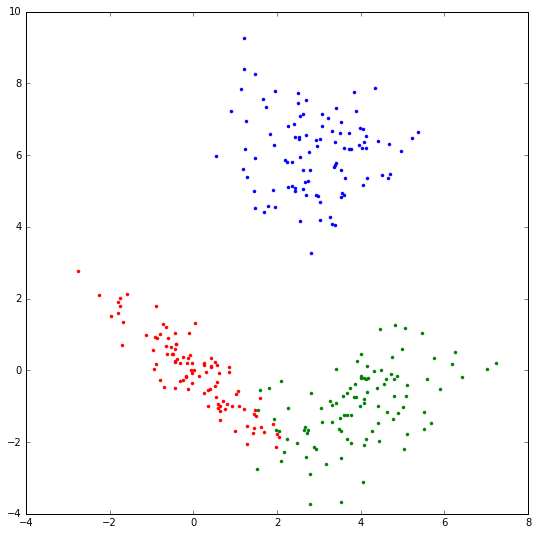

In [96]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,-0.9],[-0.9,1]]
m2 = [3.,6.]
s2 = [[1,0],[0,1]]
m3 = [4.,-1.]
s3 = [[1,0.5],[0.5,1]]
print s3
c1 = np.random.multivariate_normal(m1,s1,100)        #multivariate_normal(mean, cov[, size])
c2 = np.random.multivariate_normal(m2,s2,100)
c3 = np.random.multivariate_normal(m3,s3,100)
import matplotlib.pyplot as plt


plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')
plt.plot(c3[:,0],c3[:,1],'g.')


plt.gcf().set_size_inches((9,9))


<div class = "alert alert-success" style = "border-radius:10px">**EXERCISE: ** Code the classifier and check the boundaries of the Gaussian discriminant classifier. Check the solution for different priors of the classes.</div>

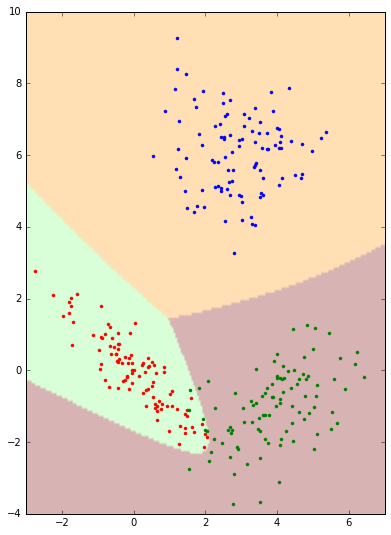

In [97]:
#your code
#Create data that covers the full space to explore
xx,yy = np.meshgrid(np.linspace(-3,7,200),np.linspace(-4,10,200))
viz = np.c_[xx.ravel(),yy.ravel()].T

#### CODE HERE YOUR GAUSSIAN DISCRIMINANT CLASSIFIER and evaluate it on data stored in viz

g1 = Gaussian()
g2 = Gaussian()
g3 = Gaussian()

g1.fit_(c1)
g2.fit_(c2)
g3.fit_(c3)

prior1 = 1./3
prior2 = 1./3
prior3 = 1-prior1-prior2

y1 = g1.predict_proba(viz.T)*prior1            # the denominator in the posterior are same, for comparation, we don't need to compute it.
y2 = g2.predict_proba(viz.T)*prior2
y3 = g3.predict_proba(viz.T)*prior3

z = np.argmax(np.c_[y1,y2,y3],axis=1)/2.

# NOTE: z is a variable of size (40000,) that stores the predicted label

plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')
plt.plot(c3[:,0],c3[:,1],'g.')
plt.gca().set_xlim([-3.,7.])
plt.gca().set_ylim([-4.,10.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-3,7,-4,10),alpha=0.3, vmin=-1, vmax=1)
plt.gcf().set_size_inches((9,9))



# Principal component analysis

Using the same intuition of modeling data with a Gaussian distribution and considering the interpretation of the Gaussian model we can use this to **reduce dimensionality** when in front of a high dimensional problem. This is called *principal component analysis*. 

The basic idea is to project data just in a subset of the eigenvectors of the covariance matrix with larger eigenvalues so that the direccion of the maximum variation are preserved.

In this sense, we have to define the amount of dimensions to preserve. This can be either:

+ a fixed value set beforehand, 
+ the amount of that preserve some percentage of the "energy". Energy of a signal is related to the variance of the data. Thus from the full scaling defined by the eigenvalues we can preserve the amount of vectors such that the sum of the eigen values accounts for example to the 90% of the variation.


## A note on eigenvectors and eigenvalues

We have seen that the eigenvectors and eigenvalues 
Supose the following problem

$$\underset{w}{\text{maximize}}\quad\frac{w^T A w}{w^T w}$$

The solution of this problem can be analytically found using $\nabla_w =0$. Thus,

$$(Aw + (w^TA)^T )(w^Tw)^{-1} - 2 w^TAw w (w^Tw)^{-2} = 0$$

$$ Aw - w^TAw w (w^Tw)^{-1} = 0 $$

$$\frac{Aw}{w^TAw} = \frac{w}{w^Tw}$$

Note that the solution of the former problem corresponds to the eigenvector of maximum eigenvalue.


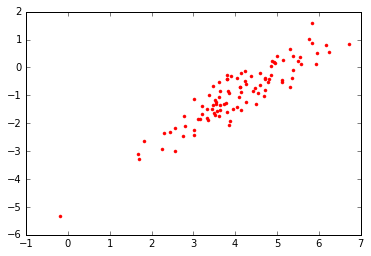

In [145]:
m1 = [4.,-1.]
s1 = [[1,0.9],[0.9,1]]
c1 = np.random.multivariate_normal(m1,s1,100)
plt.plot(c1[:,0],c1[:,1],'r.')

In [146]:
vaps,veps = np.linalg.eig(np.cov(c1.T))
P = veps
print P,"\n"
print veps[0,0]

[[ 0.72266989 -0.69119334]
 [ 0.69119334  0.72266989]] 

0.722669886003


(-10, 10)

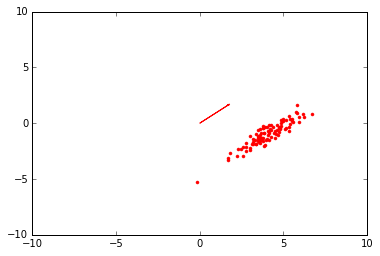

In [147]:
plt.plot(c1[:,0],c1[:,1],'r.')
plt.arrow(0,0,vaps[0]*veps[0,0],vaps[0]*veps[1,0],0.5,linewidth=1,head_width=0.1,color='red')
plt.gca().set_xlim([-10,10])
plt.gca().set_ylim([-10,10])

(-10, 10)

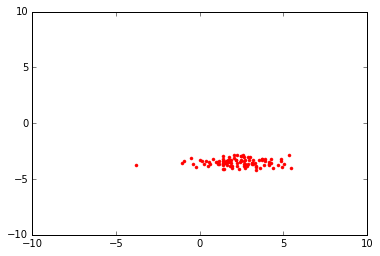

In [148]:
ct = np.dot(c1,P)
plt.plot(ct[:,0],ct[:,1],'r.')
plt.gca().set_xlim([-10,10])
plt.gca().set_ylim([-10,10])

In [149]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X=data.data
y=data.target
print "dimension:",X.shape, y.shape

from sklearn import neighbors
from sklearn import cross_validation


x_train, x_test, y_train, y_test =cross_validation.train_test_split(X,y,test_size=0.3)
clf  = neighbors.KNeighborsClassifier(n_neighbors=1)
clf  = clf.fit(x_train,y_train)

clf.score(x_test,y_test)

dimension: (569, 30) (569,)


0.9064327485380117

<div class = "alert alert-success" style = "border-radius:10px">**EXERCISE: ** Code principal component analysis. Reduce the dimensionality to 5 dimensions and compute the classification score. Store the **HINT:** `numpy.linalg.eig` return the eigenvalues and eigenvectors decomposition.</div>

In [150]:
# your code here

# Store eigenvectors in veps and eigenvalues in vaps. The projection matrix is P

vaps,veps = np.linalg.eig(np.cov(x_train.T))

idx = np.argsort(vaps[::-1])
P = veps[:,idx[:5]]
print P.shape

(30, 5)


In [151]:
x_hat_train = np.dot(x_train,P)
x_test = x_test
x_hat_test = np.dot(x_test,P)

clf  = neighbors.KNeighborsClassifier(n_neighbors=1)
clf  = clf.fit(x_hat_train,y_train)

clf.score(x_hat_test,y_test)

0.87134502923976609

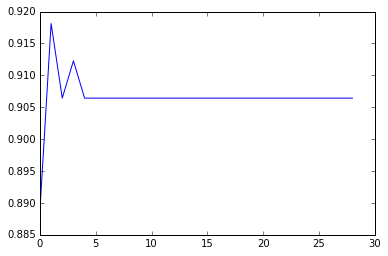

In [152]:
s = []
for i in xrange(1,veps.shape[1]):
    P = veps[:,:i]
    x_hat_train = np.dot(x_train,P)
    x_hat_test = np.dot(x_test,P)

    clf  = neighbors.KNeighborsClassifier(n_neighbors=1)
    clf  = clf.fit(x_hat_train,y_train)

    s.append(clf.score(x_hat_test,y_test))
    
plt.plot(s)

<div class = "alert alert-success" style="border-radius:10px"> **EXERCISE: ** 
<ol>
<li>
Consider problem 1 and answer the following question: Is the direction of the first principal component a good direction for discrimination purposes?</li>
<li> 
Consider problem 2 and answer the following question: Is the direction of the first principal component a good direction for discrimination purposes?</li>
</ol>
   
</div>

### Problem 1

[[1, 0.5], [0.5, 1]]


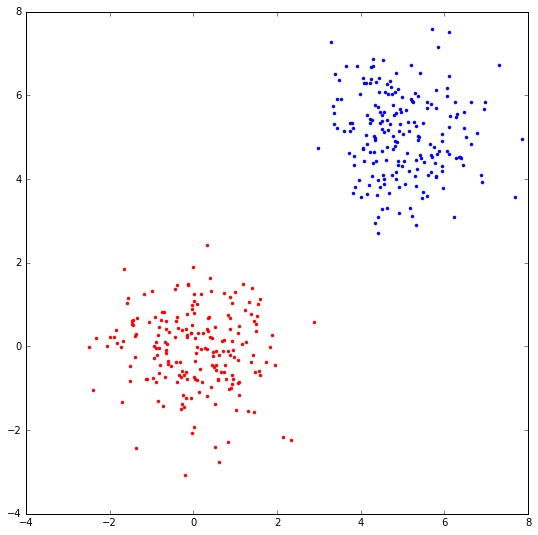

In [46]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,0],[0,1]]
m2 = [5.,5.]
s2 = [[1,0],[0,1]]

print s3
c1 = np.random.multivariate_normal(m1,s1,200)
c2 = np.random.multivariate_normal(m2,s2,200)
import matplotlib.pyplot as plt


plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')


plt.gcf().set_size_inches((9,9))

### Problem 2

[[1, 0.5], [0.5, 1]]


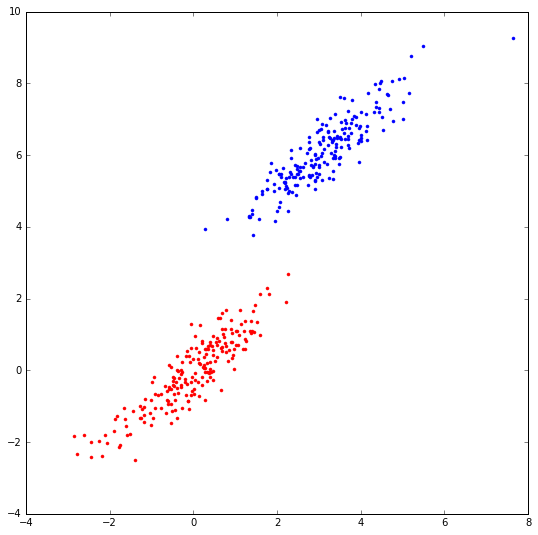

In [48]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,0.9],[0.9,1]]
m2 = [3.,6.]
s2 = [[1,0.9],[0.9,1]]

print s3
c1 = np.random.multivariate_normal(m1,s1,200)
c2 = np.random.multivariate_normal(m2,s2,200)
import matplotlib.pyplot as plt


plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')


plt.gcf().set_size_inches((9,9))

Xiaoxia:

PROBLEM1: yes, the principle component is the line in diagonal, if we project over the diagonal, we would separate perfectly two sets.

PROBLEM2: No, the points in the middle would overlap. 

Check the principal component.

[  0.23743043  13.65453717]


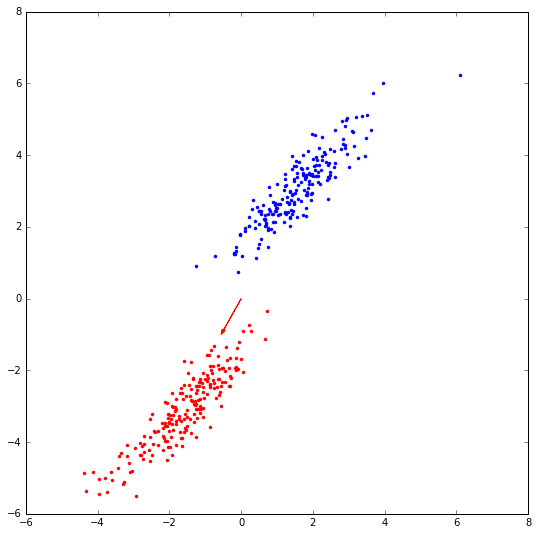

In [53]:
x = np.r_[c1,c2]
S = np.cov(x,rowvar=False)

vaps,veps=np.linalg.eig(S)

idx = np.argmax(vaps)
vep = veps[:,idx]
print vaps

m = np.mean(np.r_[c1,c2],axis=0)

plt.plot(c1[:,0]-m[0],c1[:,1]-m[1],'r.')
plt.plot(c2[:,0]-m[0],c2[:,1]-m[1],'b.')


plt.gcf().set_size_inches((9,9))
plt.arrow(0,0,vep[0],vep[1],0.5,linewidth=1,head_width=0.1,color='red')


## Fisher's linear discriminant analysis

Principal component analysis is purely an unsupervised technique that can be used to reduce dimensionality. In the case we have labels we could exploit that information to find a better projection in terms of discriminability. Fisher's linear discriminant analysis looks for that projection.

Remember that given any application $A$, the eigen vector correspon to the principal axis and the magnitude of the transformation of the application is given by the corresponding eigenvalue. This property can be used to maximize objective functions that can be written as linear operators by selecting the eigenvalue with maximum value. In this sense, if we look for the direction where data vary the most, we express the problem of variation and look for the eigenvector with maximum eigenvalue. 

We can take advantage of this and model different properties.

<div class = "alert alert-success" style="border-radius:10px"> **EXERCISE: ** 
Consider problem 2. What properties can we consider for finding a direction of maximum discriminability?
</div>

Let us now define the following problem 

$$J(w) = \frac{w^T S_b w}{w^T S_w w}$$

where $S_b$ is the “between classes scatter matrix” and $S_w$ is the “within classes scatter matrix” defined as follows:

$$S_b = \sum_c (\mu_c-\bar{x})^T(\mu_c-\bar{x})$$

$$S_w = \sum_c \sum_{x_i : y_i = c} (x_i-\mu_c)^T(x_i-\mu_c)$$

Note that scatter matrices corresponds to the unnormalized covariance matrices.

The objective tries to push the centers of both classes as far appart from the center as possible by maximizing $S_b$. Additionally, minimizes the covariance of each of the classes individually.


[[1, 0.5], [0.5, 1]]


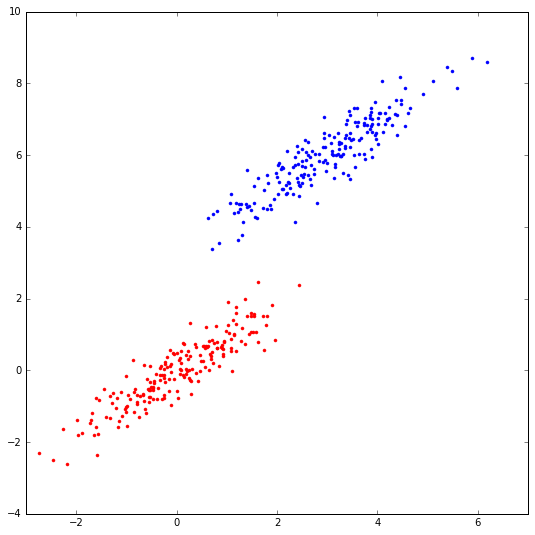

In [129]:
%matplotlib inline
import numpy as np
m1 = [0.,0.]
s1 = [[1,0.9],[0.9,1]]
m2 = [3.,6.]
s2 = [[1,0.9],[0.9,1]]

print s3
c1 = np.random.multivariate_normal(m1,s1,200)
c2 = np.random.multivariate_normal(m2,s2,200)
import matplotlib.pyplot as plt


plt.plot(c1[:,0],c1[:,1],'r.')
plt.plot(c2[:,0],c2[:,1],'b.')


plt.gcf().set_size_inches((9,9))

In [130]:
x_bar = np.mean(np.r_[c1,c2],axis=0)
mu_1 = np.mean(c1,axis=0)
mu_2 = np.mean(c2,axis=0)

m1x=mu_1-x_bar
m2x=mu_2-x_bar
Sb = np.dot(m1x[:,np.newaxis],m1x[:,np.newaxis].T)+np.dot(m2x[:,np.newaxis],m2x[:,np.newaxis].T)

Sw = np.dot((c1-mu_1).T,(c1-mu_1)) + np.dot((c2-mu_2).T,(c2-mu_2))

In [131]:
print np.dot((c1-mu_1).T,(c1-mu_1)) /c1.shape[0]
print np.cov(c1,rowvar=False)
print Sb,np.cov(np.c_[mu_1,mu_2].T)

[[ 0.97870409  0.84927229]
 [ 0.84927229  0.9007599 ]]
[[ 0.9836222   0.85353999]
 [ 0.85353999  0.90528633]]
[[  4.37481382   8.88254681]
 [  8.88254681  18.0349704 ]] [[  1.91158121e-04  -2.96059949e-02]
 [ -2.96059949e-02   4.58528746e+00]]


In [136]:
A = np.dot(np.linalg.pinv(Sw),Sb)

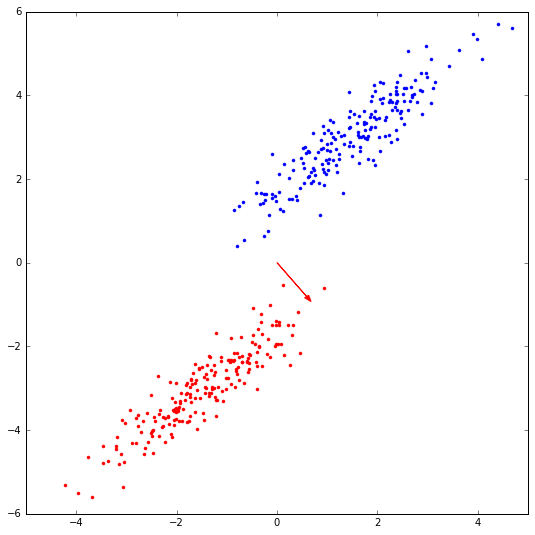

In [137]:
vaps,veps = np.linalg.eig(A)
vep = veps[:,np.argmax(vaps)]

m = np.mean(np.r_[c1,c2],axis=0)

plt.plot(c1[:,0]-m[0],c1[:,1]-m[1],'r.')
plt.plot(c2[:,0]-m[0],c2[:,1]-m[1],'b.')


plt.gcf().set_size_inches((9,9))
plt.arrow(0,0,vep[0],vep[1],0.5,linewidth=1,head_width=0.1,color='red')

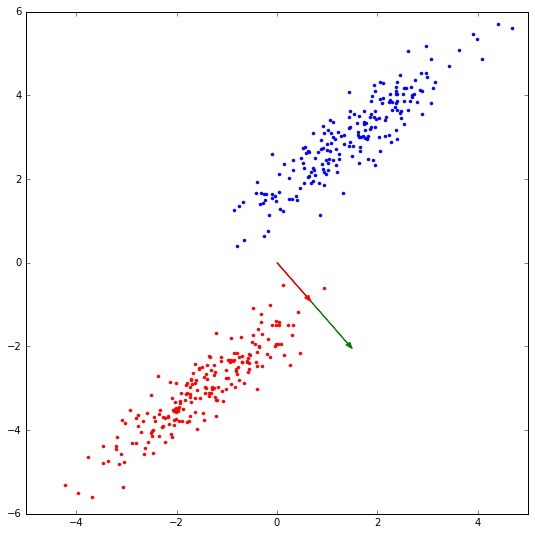

In [140]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
x = np.r_[c1,c2]
y = np.r_[np.ones((c1.shape[0],1)),-np.ones((c2.shape[0],1))]
clf = LinearDiscriminantAnalysis(n_components=2)
clf.fit(x,y.ravel())
coef = clf.coef_[0]
vep = veps[:,np.argmax(vaps)]

m = np.mean(np.r_[c1,c2],axis=0)

plt.plot(c1[:,0]-m[0],c1[:,1]-m[1],'r.')
plt.plot(c2[:,0]-m[0],c2[:,1]-m[1],'b.')


plt.gcf().set_size_inches((9,9))
plt.arrow(0,0,0.1*coef[0],0.1*coef[1],0.5,linewidth=1,head_width=0.1,color='green')  # sklearn approach
plt.arrow(0,0,vep[0],vep[1],0.5,linewidth=1,head_width=0.1,color='red')              # our approach

In [141]:
from IPython.display import HTML
HTML('<iframe src="https://goo.gl/forms/2nWSmx1tUdLK3K1C3" width = 1000 height=400></iframe>')
